# Manhattan Plot

Manhattan plots have become an essential tool to visualize GWAS summary statistics. Then, it is essential to have a highly customizable tool to draw this kind of plots. Even though there are many resources available to draw Manhattan plots, it still is a valuable functionality to have in out toolkit.

In this notebook we intend to show how can be used the library `IDEAL-GENOM` to generate a Manhattan Plot. 

In [1]:
import sys
import os

import pandas as pd

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from ideal_genom.visualization.manhattan_type import manhattan_draw
from ideal_genom.get_examples import get_trumpet_quantitative_example, get_top_loci_trumpet_quantitative, get_top_cond_trumpet_quantitative

The data is taken from the article:

Akiyama, M., et. al. (2019): Characterizing rare and low-frequency height-associated variants in the Japanese population. *Nature communications*, **10**(1), 4393.

It the summary statistics has not been downloaded already, we proceed to fetch it or we get the path to it.

In [2]:
example_path = get_trumpet_quantitative_example()

2025-06-23 12:45:56,654 - INFO - File already exists: /home/luis/CGE/ideal-genom/data/sumstats/2019_BBJ_Height_autosomes_BOLT.txt


We load the data by chunks given that the file is not small.

In [3]:
chunk_size = 2000

filtered_chunks=[]

for chunk in pd.read_csv(example_path, sep=r'\s+', engine='python', chunksize=chunk_size):
    
    filtered_chunk = chunk[['CHR', 'POS', 'P_BOLT', 'Variants']].copy()
    filtered_chunk = filtered_chunk[filtered_chunk['P_BOLT'] < 0.05].reset_index(drop=True)
    filtered_chunks.append(filtered_chunk)

df_gwas = pd.concat(filtered_chunks, ignore_index=True)

Let us look at how many SNPs from autosomal chromosomes are present in the summary statistics.

In [4]:
print("Number of SNPs in GWAS data: ", df_gwas.shape[0])
print("Columns in GWAS data: ", df_gwas.columns.to_list())

Number of SNPs in GWAS data:  2316283
Columns in GWAS data:  ['CHR', 'POS', 'P_BOLT', 'Variants']


Here we draw a very simple Manhattan plot.

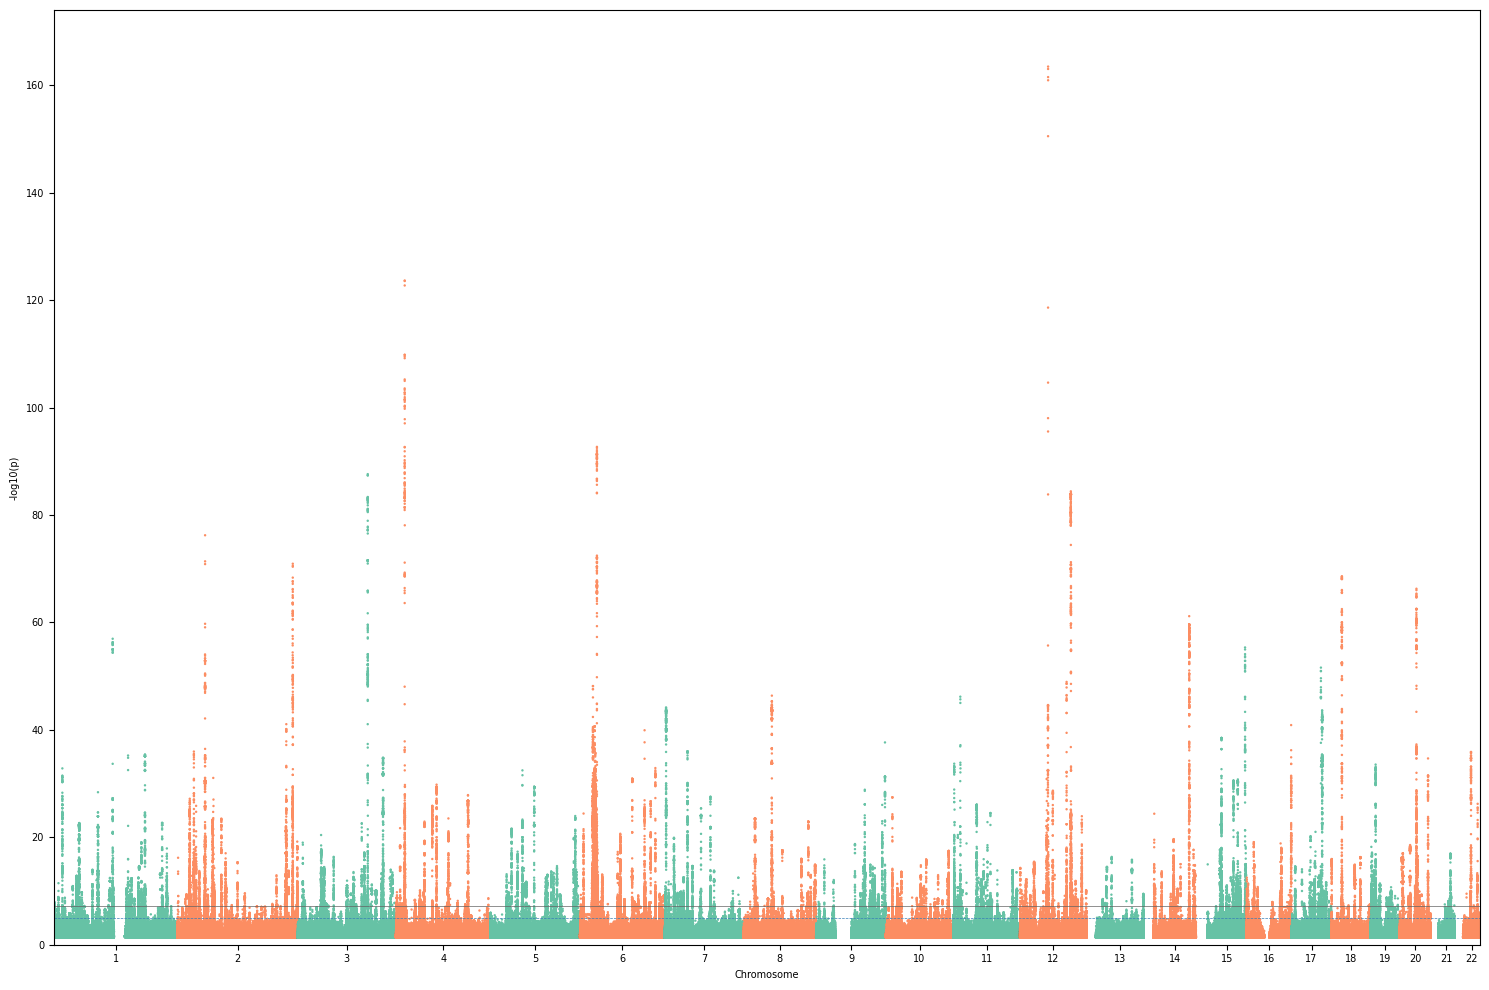

True

In [5]:
manhattan_draw(
    data_df=df_gwas, 
    snp_col='Variants', 
    chr_col='CHR', 
    pos_col='POS', 
    p_col='P_BOLT', 
    plot_dir=example_path.parent.as_posix(), 
    to_highlight=pd.DataFrame(), # no highlights
    save_name='manhattan_plot_simple.svg', 
    genome_line = 5e-8, 
    yaxis_margin = 10
)

Now, let us fetch and load some data to highlight SNPs of particular interest.

In [5]:
loci_path = get_top_loci_trumpet_quantitative()
cond_path = get_top_cond_trumpet_quantitative()

2025-06-23 12:48:12,079 - INFO - File already exists: /home/luis/CGE/ideal-genom/data/sumstats/2019_BBJ_Height_autosomes_BOLT_loci.csv
2025-06-23 12:48:12,080 - INFO - File already exists: /home/luis/CGE/ideal-genom/data/sumstats/2019_BBJ_Height_autosomes_BOLT_cond.csv


In [6]:
loci_hits = pd.read_csv(loci_path, sep=r'\s+', engine='python')
cond_hits = pd.read_csv(cond_path, sep=r'\s+', engine='python')

In [7]:
loci_hits = pd.merge(df_gwas, loci_hits, on='Variants', how='inner')
cond_hits = pd.merge(df_gwas, cond_hits, on=['CHR', 'POS'], how='inner')

We are going to select the signals newly identified by the study to annotate with gene names in a later stage.

In [8]:
to_annotate = loci_hits[loci_hits['New_Locus'].str.fullmatch('YES')]

In [9]:
loci_hits = loci_hits[['CHR', 'POS', 'P_BOLT', 'Variants']].copy()
loci_hits['hue']='Height associated loci'
cond_hits = cond_hits[['CHR', 'POS', 'P_BOLT', 'Variants']].copy()
cond_hits['hue']='Cond. analysis hits'

highlight = pd.concat([loci_hits, cond_hits], ignore_index=True, axis=0)

Let us draw a Manhattan plot with highlighted SNPs.

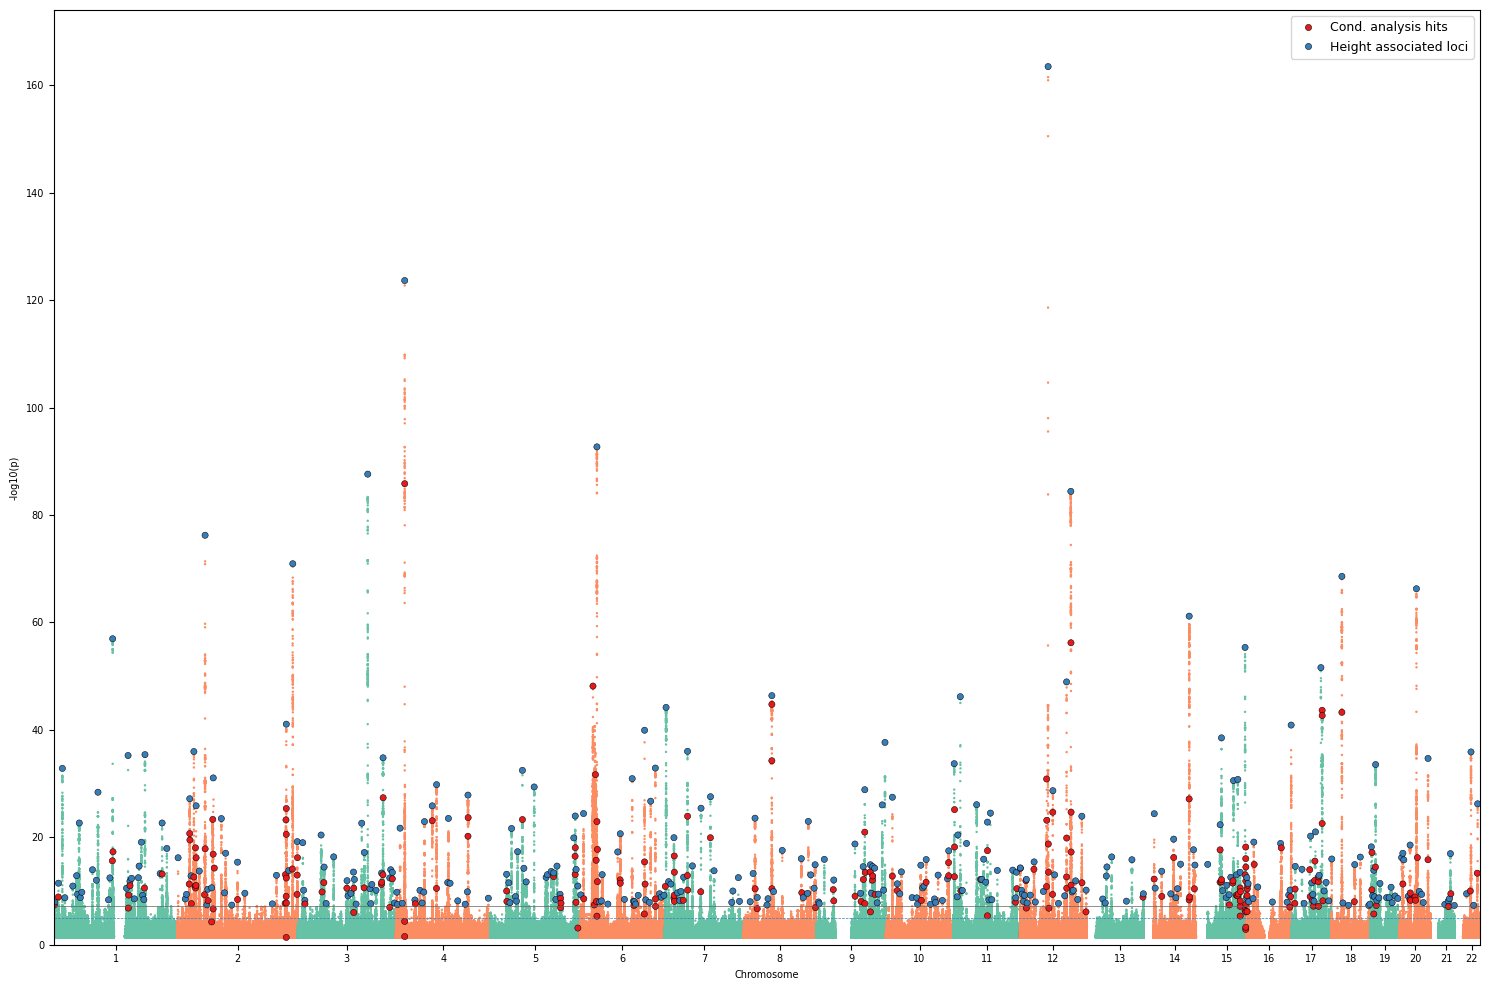

True

In [13]:
manhattan_draw(
    data_df=df_gwas, 
    snp_col='Variants', 
    chr_col='CHR', 
    pos_col='POS', 
    p_col='P_BOLT', 
    plot_dir=example_path.parent.as_posix(), 
    save_name='manhattan_plot_high.png', 
    genome_line = 5e-8, 
    yaxis_margin = 10,
    to_highlight=highlight,
    highlight_hue='hue'
)

In case that we wanted to annotate with gene names the new loci associated with height, it is quite simple. The user just to have into account the build of the human genome for the coordinates as well as the database to fetch the gene names.

2025-06-24 10:16:32,701 - INFO - Type of gtf_path is <class 'NoneType'>
2025-06-24 10:16:32,702 - INFO - Starting to annotate variants with nearest gene name(s)...
2025-06-24 10:16:32,702 - INFO -  -Using 37 as genome build
2025-06-24 10:16:32,703 - INFO - is_gtf_path set to False
2025-06-24 10:16:32,703 - INFO -  -Using ensembl as source for gene annotation
2025-06-24 10:16:32,704 - INFO -  -Assigning Gene name using Ensembl GRCh37 for protein coding genes
2025-06-24 10:16:32,704 - INFO -  -Downloading Ensembl GRCh37 GTF file
2025-06-24 10:16:32,924 - INFO - Latest GTF file: Homo_sapiens.GRCh37.87.chr.gtf.gz
2025-06-24 10:16:32,924 - INFO - Download URL: https://ftp.ensembl.org/pub/grch37/release-114/gtf/homo_sapiens/Homo_sapiens.GRCh37.87.chr.gtf.gz
2025-06-24 10:16:32,925 - INFO - File already exists: /home/luis/CGE/ideal-genom/data/ensembl_latest/Homo_sapiens.GRCh37.87.chr.gtf.gz
2025-06-24 10:16:32,926 - INFO - File already exists: /home/luis/CGE/ideal-genom/data/ensembl_latest/Ho

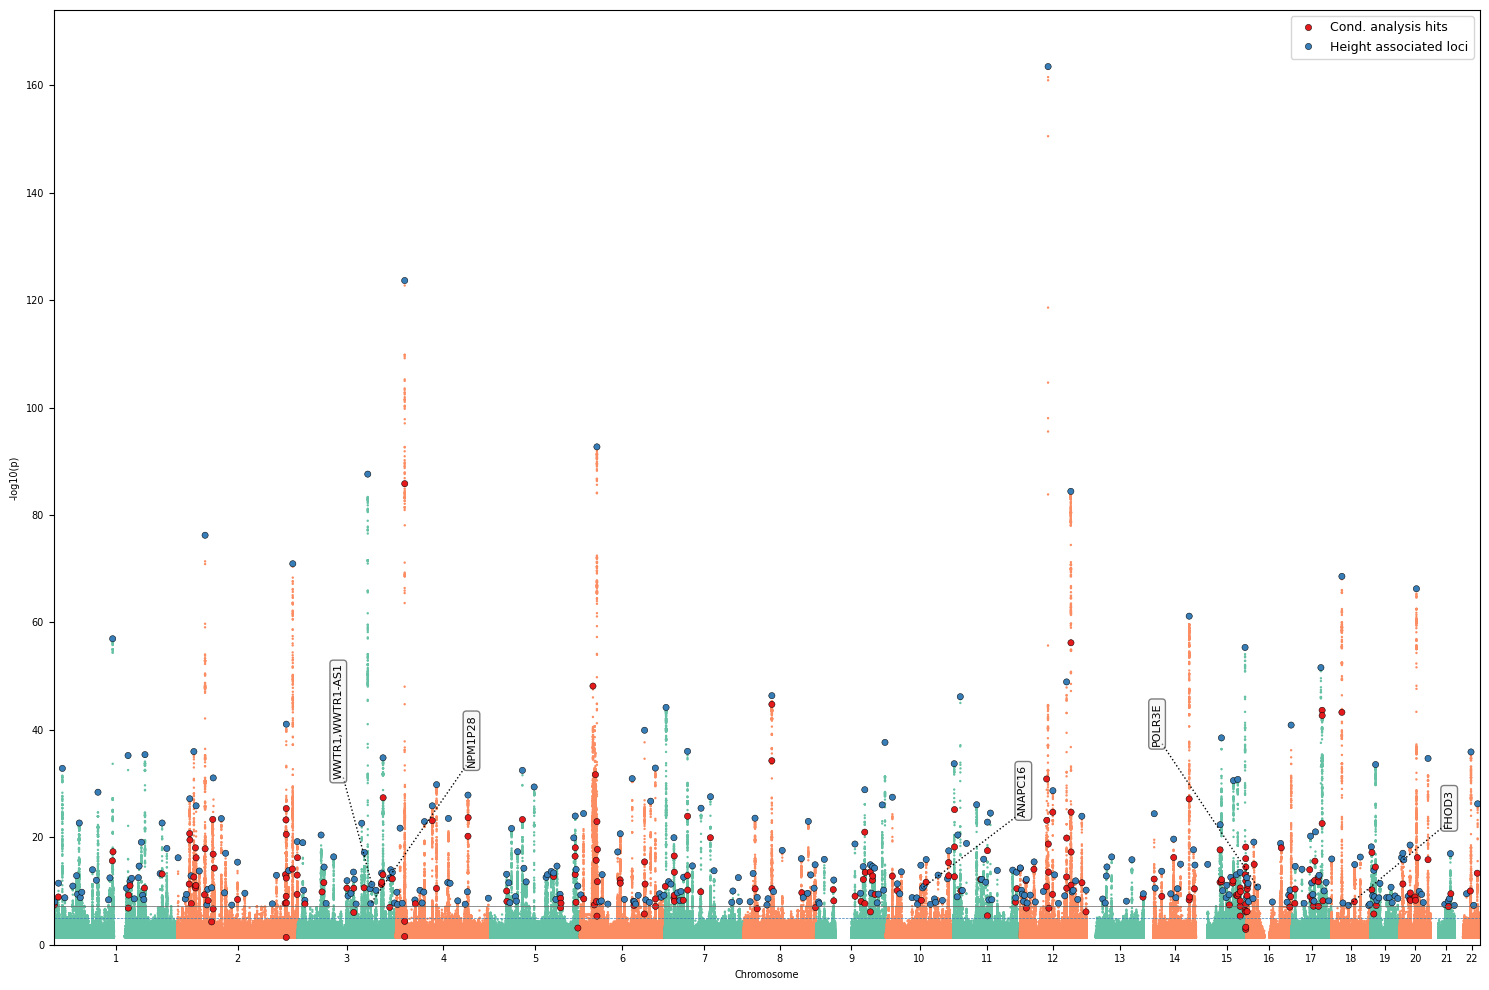

True

In [14]:
manhattan_draw(
    data_df=df_gwas, 
    snp_col='Variants', 
    chr_col='CHR', 
    pos_col='POS', 
    p_col='P_BOLT', 
    plot_dir=example_path.parent.as_posix(), 
    save_name='manhattan_plot_anno.png', 
    genome_line = 5e-8, 
    yaxis_margin = 10,
    to_highlight=highlight,
    highlight_hue='hue',
    to_annotate=to_annotate,
    anno_source='ensembl',
    build='37',
    dpi=500
)

2025-06-24 10:22:52,206 - INFO - Type of gtf_path is <class 'NoneType'>
2025-06-24 10:22:52,207 - INFO - Starting to annotate variants with nearest gene name(s)...
2025-06-24 10:22:52,207 - INFO -  -Using 37 as genome build
2025-06-24 10:22:52,207 - INFO - is_gtf_path set to False
2025-06-24 10:22:52,208 - INFO -  -Using ensembl as source for gene annotation
2025-06-24 10:22:52,208 - INFO -  -Assigning Gene name using Ensembl GRCh37 for protein coding genes
2025-06-24 10:22:52,208 - INFO -  -Downloading Ensembl GRCh37 GTF file
2025-06-24 10:22:52,555 - INFO - Latest GTF file: Homo_sapiens.GRCh37.87.chr.gtf.gz
2025-06-24 10:22:52,556 - INFO - Download URL: https://ftp.ensembl.org/pub/grch37/release-114/gtf/homo_sapiens/Homo_sapiens.GRCh37.87.chr.gtf.gz
2025-06-24 10:22:52,557 - INFO - File already exists: /home/luis/CGE/ideal-genom/data/ensembl_latest/Homo_sapiens.GRCh37.87.chr.gtf.gz
2025-06-24 10:22:52,557 - INFO - File already exists: /home/luis/CGE/ideal-genom/data/ensembl_latest/Ho

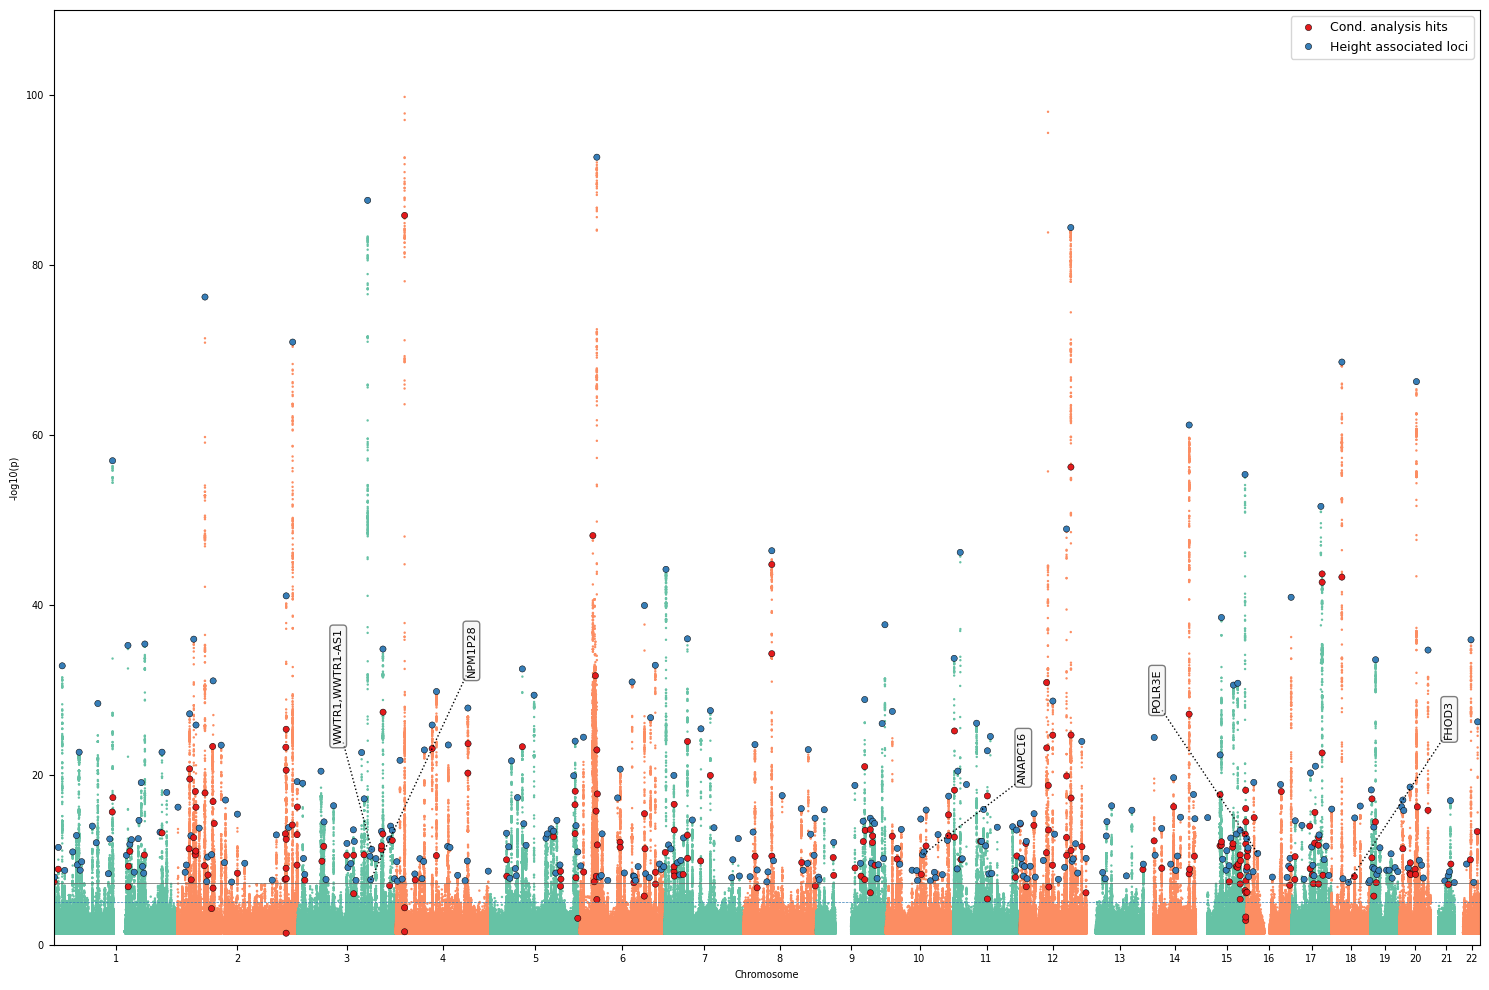

True

In [16]:
manhattan_draw(
    data_df=df_gwas, 
    snp_col='Variants', 
    chr_col='CHR', 
    pos_col='POS', 
    p_col='P_BOLT', 
    plot_dir=example_path.parent.as_posix(), 
    save_name='manhattan_plot_anno_truncated.png', 
    genome_line = 5e-8, 
    yaxis_margin = 10,
    to_highlight=highlight,
    highlight_hue='hue',
    to_annotate=to_annotate,
    anno_source='ensembl',
    build='37',
    dpi=600,
    upper_cap=100.0
)